#Python Code

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhruvildave/new-york-city-taxi-trips-2019")

print("Path to dataset files:", path)

C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.38G/2.38G [01:11<00:00, 35.7MB/s]

Extracting files...


Path to dataset files: C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4


In [ ]:
import os
# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['2019', 'data_dictionary.pdf', 'taxi_zones', 'taxi_zone_lookup.csv']


In [ ]:
# Define the dataset path
dataset_path = path

# List files inside '2019' directory
year_2019_path = os.path.join(dataset_path, "2019")
if os.path.exists(year_2019_path):
    print("Files in 2019 folder:", os.listdir(year_2019_path))

# List files inside 'taxi_zones' directory
taxi_zones_path = os.path.join(dataset_path, "taxi_zones")
if os.path.exists(taxi_zones_path):
    print("Files in taxi_zones folder:", os.listdir(taxi_zones_path))

Files in 2019 folder: ['2019-01.sqlite', '2019-02.sqlite', '2019-03.sqlite', '2019-04.sqlite', '2019-05.sqlite', '2019-06.sqlite', '2019-07.sqlite', '2019-08.sqlite', '2019-09.sqlite', '2019-10.sqlite', '2019-11.sqlite', '2019-12.sqlite']
Files in taxi_zones folder: ['taxi_zones.dbf', 'taxi_zones.prj', 'taxi_zones.sbn', 'taxi_zones.sbx', 'taxi_zones.shp', 'taxi_zones.shp.xml', 'taxi_zones.shx']


In [ ]:
import sqlite3
import pandas as pd
import os

# Define output CSV file
output_csv = "nyc_taxi_2019_combined.csv"

# Get all SQLite files
sqlite_files = [os.path.join(path, "2019", f) for f in os.listdir(os.path.join(path, "2019")) if f.endswith(".sqlite")]

# Create an empty CSV file with headers from the first file
first_file = sqlite_files[0]
conn = sqlite3.connect(first_file)
df_temp = pd.read_sql("SELECT * FROM tripdata LIMIT 1000;", conn)  # Load small preview
conn.close()
df_temp.to_csv(output_csv, index=False)  # Save headers only

# Append data month by month
for file in sqlite_files:
    print(f"Processing {file}...")
    conn = sqlite3.connect(file)

    # Read in chunks to prevent memory overload
    chunk_size = 500000  # Adjust based on system memory
    for chunk in pd.read_sql("SELECT * FROM tripdata;", conn, chunksize=chunk_size):
        chunk.to_csv(output_csv, mode='a', header=False, index=False)

    conn.close()
    print(f"Finished {file}")

print("All data saved to CSV without crashing!")

Processing C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-01.sqlite...
Finished C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-01.sqlite
Processing C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-02.sqlite...
Finished C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-02.sqlite
Processing C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-03.sqlite...
Finished C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-03.sqlite
Processing C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-04.sqlite...
Finished C:\Users\crist\.cache\kagglehub\datasets\dhruvildave\new-york-city-taxi-trips-2019\versions\4\2019\2019-04.sql

In [2]:
import pandas as pd

# Load only first 10,000 rows
df = pd.read_csv("nyc_taxi_2019_combined.csv", nrows=10000, low_memory=False)

# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Remove invalid trip distances & fares
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

print(df.info())
print(df.head())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   vendorid               9923 non-null   float64       
 1   tpep_pickup_datetime   9923 non-null   datetime64[ns]
 2   tpep_dropoff_datetime  9923 non-null   datetime64[ns]
 3   passenger_count        9923 non-null   float64       
 4   trip_distance          9923 non-null   float64       
 5   ratecodeid             9923 non-null   float64       
 6   store_and_fwd_flag     9923 non-null   object        
 7   pulocationid           9923 non-null   float64       
 8   dolocationid           9923 non-null   float64       
 9   payment_type           9923 non-null   float64       
 10  fare_amount            9923 non-null   float64       
 11  extra                  9923 non-null   float64       
 12  mta_tax                9923 non-null   float64       
 13  tip_amou

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric columns
scaler = StandardScaler()
df[['trip_distance', 'fare_amount', 'total_amount', 'tolls_amount']] = scaler.fit_transform(df[['trip_distance', 'fare_amount', 'total_amount', 'tolls_amount']])

# Convert categorical fields to numerical encoding
df['payment_type'] = df['payment_type'].astype(int)
df['vendorid'] = df['vendorid'].astype(int)
df['ratecodeid'] = df['ratecodeid'].astype(int)

# Remove outliers using IQR
Q1 = df[['fare_amount', 'trip_distance']].quantile(0.25)
Q3 = df[['fare_amount', 'trip_distance']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['fare_amount', 'trip_distance']] < (Q1 - 1.5 * IQR)) | (df[['fare_amount', 'trip_distance']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data Cleaning Complete!")

Data Cleaning Complete!


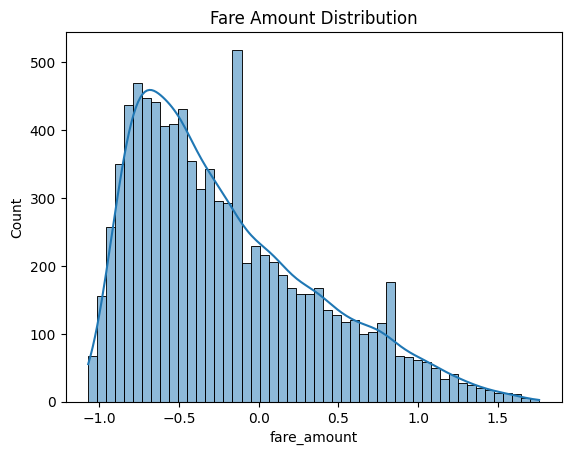

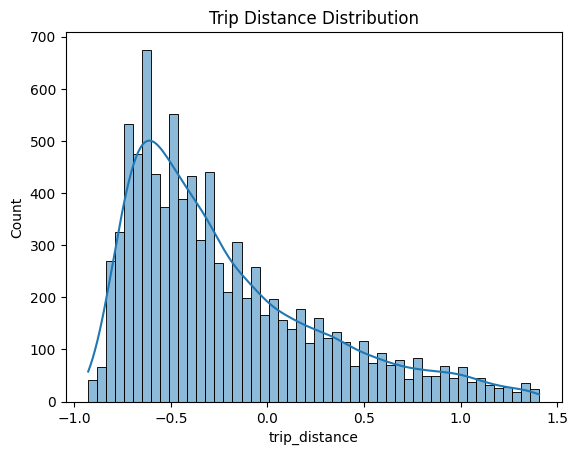

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Histogram of fares
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.show()

# Histogram of trip distances
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Trip Distance Distribution")
plt.show()

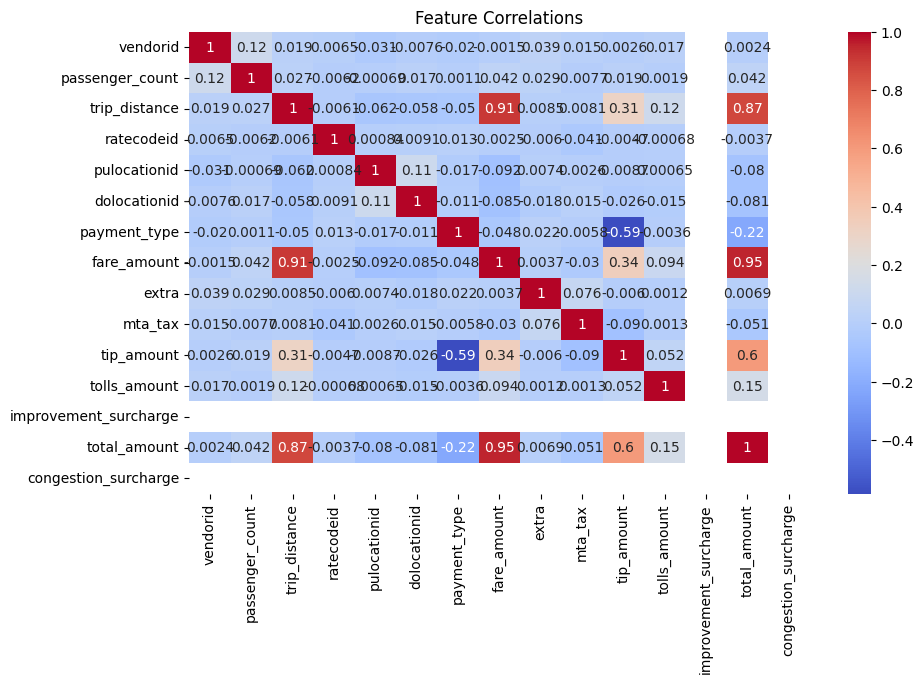

In [5]:
# Select only numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

c:\Users\crist\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


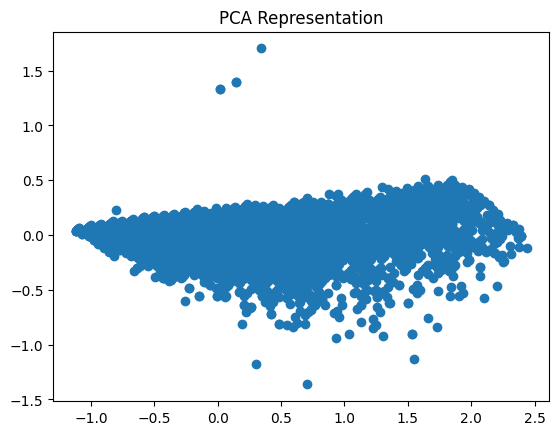

c:\Users\crist\miniconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


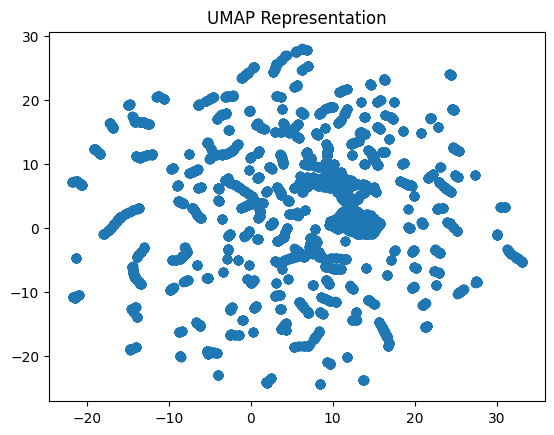

In [6]:
from sklearn.decomposition import PCA
import umap.umap_ as umap

# Apply PCA (Linear)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['trip_distance', 'fare_amount']])
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Representation")
plt.show()

# Apply UMAP (Non-Linear)
X_umap = umap.UMAP(n_components=2).fit_transform(df[['trip_distance', 'fare_amount']])
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title("UMAP Representation")
plt.show()

In [7]:
# Extract time-based features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Trip duration (minutes)
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Speed (miles per hour)
df['speed_mph'] = df['trip_distance'] / (df['trip_duration'] / 60 + 1e-6)

# Weekend indicator
df['is_weekend'] = (df['pickup_weekday'] >= 5).astype(int)

# Rush hour indicator (Morning: 7-9 AM, Evening: 5-7 PM)
df['is_rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if x in [7, 8, 17, 18] else 0)

# Nighttime trip indicator (Midnight - 5 AM)
df['is_night'] = (df['pickup_hour'] < 6).astype(int)

# High-fare trip classification
df['high_fare'] = (df['fare_amount'] > df['fare_amount'].median()).astype(int)

# Save cleaned and feature-engineered dataset
df.to_csv("nyc_taxi_final.csv", index=False)
print("Feature Engineering Complete!")

Feature Engineering Complete!


Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01
R² Score: 0.9952


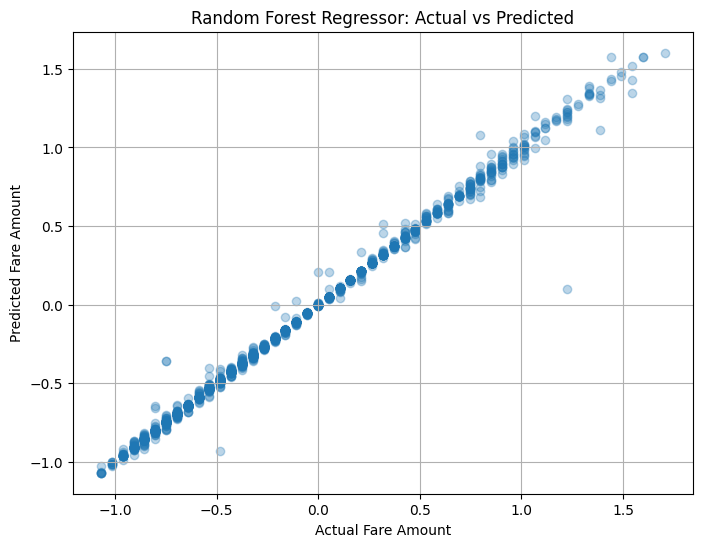

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# X: your feature matrix (already preprocessed)
# y_reg: actual fare amount column (not the high_fare label)
y_reg = df['fare_amount']  # Make sure to use the unscaled fare_amount if available

# Keep only numeric features (drop datetime columns automatically)
X = df.drop(columns=['fare_amount', 'high_fare']).select_dtypes(include='number')

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred = rf_reg.predict(X_test_reg)

# Evaluate
mse = mean_squared_error(y_test_reg, y_pred)
mae = mean_absolute_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print("Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred, alpha=0.3)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA test
anova_result = f_oneway(
    df[df['payment_type'] == 1]['fare_amount'],  # Credit card
    df[df['payment_type'] == 2]['fare_amount'],  # Cash
    df[df['payment_type'] == 3]['fare_amount']   # No charge 
)

print("ANOVA Test Result:", anova_result)

ANOVA Test Result: F_onewayResult(statistic=13.48663040723892, pvalue=1.417178567146563e-06)
